# metrolopy

In [1]:
import metrolopy as uc

In [2]:
uc.search_units('lx')

lux (20 prefixes), 1 lx = 1 lm/m², alias: lx

In [3]:
uc.search_units('cd')

candela (20 prefixes), symbol: cd, alias: cd

In [4]:
uc.search_units('lm')

lumen (20 prefixes), 1 lm = 1 sr cd, alias: lm

In [5]:
uc.search_units('sr')

steradian (20 prefixes), 1 sr = 1 m²/m², alias: sr

In [6]:
Omega0=uc.GummyConstant(1, unit='sr')

# Measurement Uncertainty Simplest Possible Example

## Define a new Unit LSB

In [7]:
uc.Unit('Count','LSB',add_symbol=True)

LSB

Set the default output style to '+-' notation

In [8]:
uc.gummy.style='+-'

## Define the parameter for the calibration factor

In [9]:
ke = uc.gummy(0.01,u=0.0000045,unit='lux/LSB')
ke.name = 'Calibration'

In [10]:
ke

Calibration = (0.010 000 0 ± 0.000 004 5) lx/LSB

## Define the parameter for the photometer reading

In [11]:
Ye = uc.gummy(2673.3,u=1,unit='LSB')
Ye.name = 'Reading'

In [12]:
Ye

Reading = (2673.3 ± 1.0) LSB

## Define the parameter for the distance measurement

In [13]:
d = uc.gummy(25.0,u=0.0025,unit='m')
d.name = 'Distance'

In [14]:
d

Distance = (25.0000 ± 0.0025) m

# The Model

In [15]:
I=ke*Ye*d**2/Omega0

In [16]:
I

(16708 ± 10) lx m²/sr

In [17]:
I.name = 'Intensity'  #give the variables names for the plot
I.p = 0.95  # put the reference lines in the histograms at a 95% confidence interval
I.unit = 'cd' # not managed by the tool :-(

In [18]:
I

(16708 ± 20) cd with a 95% level of confidence

## Let's generate some MC Simulation data for the parameter and the result

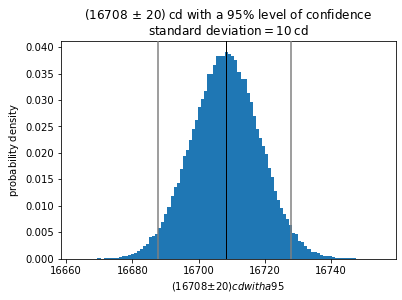

In [19]:
%matplotlib inline
uc.gummy.simulate([ke, Ye, d, I])  # generate Monte-Carlo data, default is 1e6 samples for each gummy

I.hist()  # create the histogram for a (we could have used a.hist(p=0.95) instead of a.p = 0.95 above)


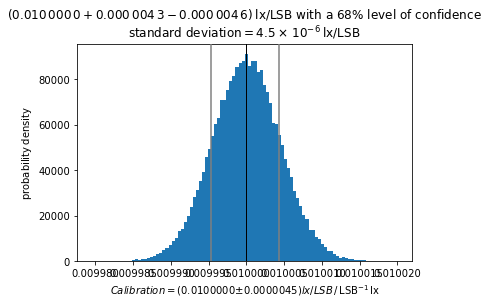

In [20]:
ke.hist()

## List the table with all results

In [21]:
I.budget([ke,Ye,d],uunit='%',sim=True, columns = ['name','unit', 'value', 'u',  's', 'c'])

Component   Unit       Value  u / %    s   |dy/dx|
         x[1] lx/LSB 0.010 000 0 4.5e-6 0.73 1 671 514
         x[2]    LSB      2673.3    1.0 0.61       6.3
         x[3]      m     25.0000 0.0025 0.32      1329
            y     cd       16708     10               
Uc at k = 2.0     cd                 20